# **Multiple Variable Linear Regression**

In [3]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [5]:
df = pd.DataFrame(data=X_train, columns=['F1', 'F2', 'F3', 'F4'])
df['target'] = y_train
df.head()

,F1,F2,F3,F4,target
0,2104,5,1,45,460
1,1416,3,2,40,232
2,852,2,1,35,178


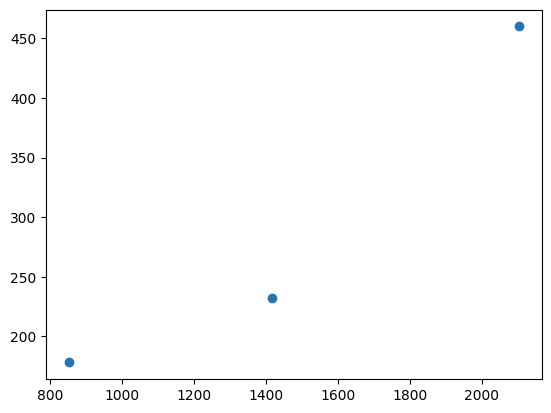

In [7]:
plt.scatter([X_train[0][0], X_train[1][0], X_train[2][0]], y_train)

In [8]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


In [9]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [10]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b
    return p

In [11]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


In [12]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar
    return cost

In [13]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


In [16]:
X_train.shape

(3, 4)

In [14]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [17]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


In [18]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}   ")

    return w, b, J_history #return final w,b and J history for graphing

In [19]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final}, target value: {y_train[i]}")

Iteration 0: Cost 2529.4629522316304   
Iteration 100: Cost 695.990315835203   
Iteration 200: Cost 694.9206979323061   
Iteration 300: Cost 693.8604297851192   
Iteration 400: Cost 692.8094286135915   
Iteration 500: Cost 691.7676123706057   
Iteration 600: Cost 690.7348997354997   
Iteration 700: Cost 689.711210107616   
Iteration 800: Cost 688.6964635999458   
Iteration 900: Cost 687.6905810327947   
b,w found by gradient descent: -0.002235407530932535,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.18530497189204, target value: 460
prediction: 286.1674720078562, target value: 232
prediction: 171.46763087132317, target value: 178


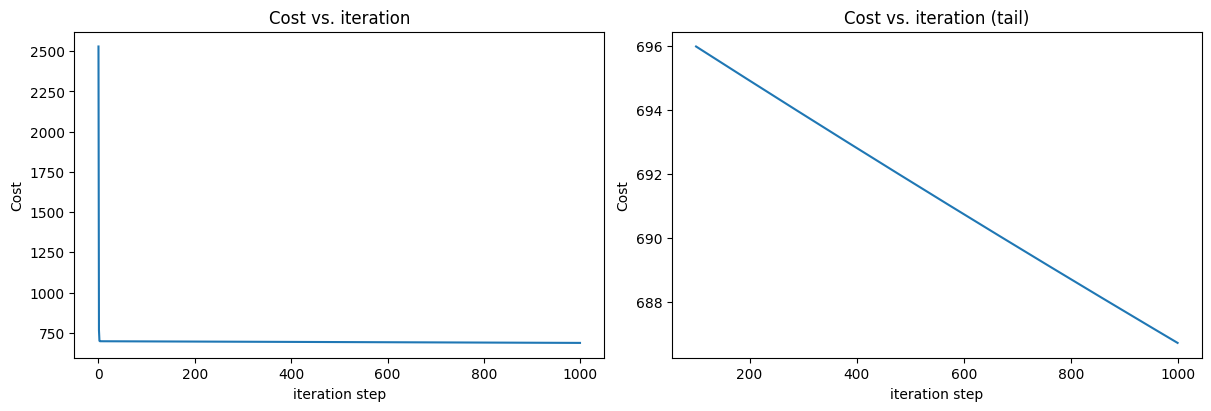

In [20]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

# **Learning Rate (Multi-variable)**

In [21]:
import pandas as pd

In [22]:
# load the dataset
df = pd.read_csv('houses_dataset.csv')
df.head()

,size(sqft),bedrooms,floors,age,price
0,952,2,1,65,271.5
1,1244,3,1,64,300.0
2,1947,3,2,17,509.8
3,1725,3,2,42,394.0
4,1959,3,2,15,540.0


In [23]:
df.shape

(100, 5)

In [24]:
X_train = df.drop('price', axis=1).values
y_train = df[['price']].values

In [25]:
X_train[:5]

array([[ 952,    2,    1,   65],
       [1244,    3,    1,   64],
       [1947,    3,    2,   17],
       [1725,    3,    2,   42],
       [1959,    3,    2,   15]])

In [26]:
y_train[:5]

array([[271.5],
       [300. ],
       [509.8],
       [394. ],
       [540. ]])

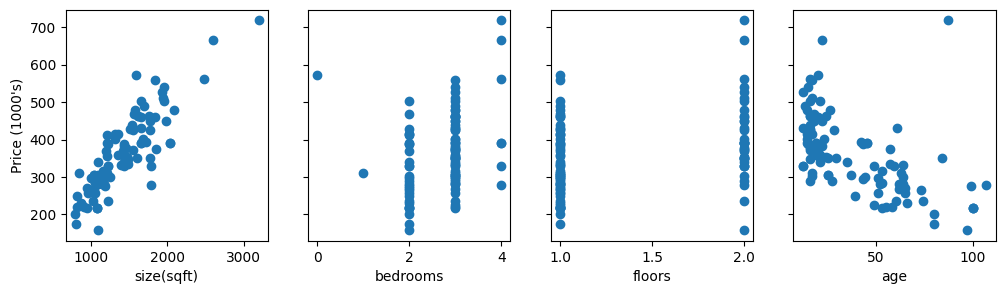

In [27]:
X_features = ['size(sqft)','bedrooms','floors','age']
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [32]:
# initialize parameters
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.
# some gradient descent settings
iterations = 4000
alpha = 9e-8
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")

Iteration 0: Cost [46547.12558938]   
Iteration 400: Cost [1554.51367934]   
Iteration 800: Cost [1540.62023106]   
Iteration 1200: Cost [1527.61931986]   
Iteration 1600: Cost [1515.45359079]   
Iteration 2000: Cost [1504.06937454]   
Iteration 2400: Cost [1493.41645064]   
Iteration 2800: Cost [1483.44782581]   
Iteration 3200: Cost [1474.11952659]   
Iteration 3600: Cost [1465.39040528]   
b,w found by gradient descent: [0.00193512],[ 0.25773349 -0.00152342 -0.00266001 -0.19389157] 


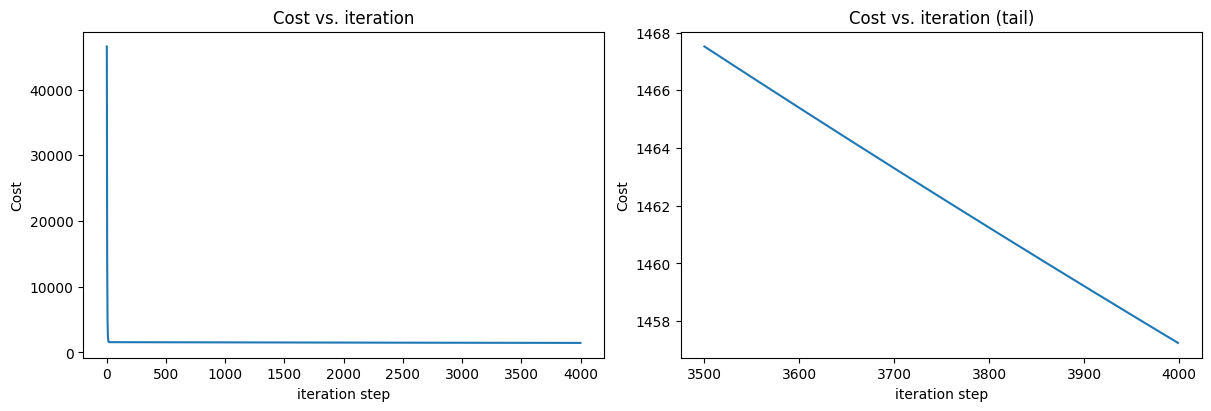

In [33]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(3500 + np.arange(len(J_hist[3500:])), J_hist[3500:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

# **Feature scaling**

In [34]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

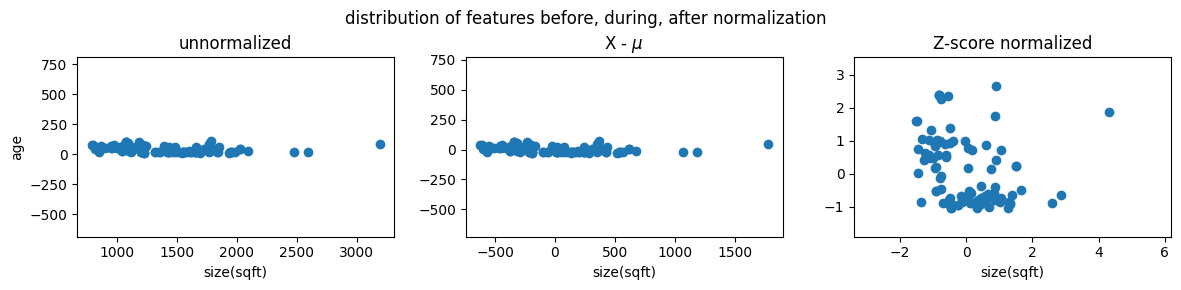

In [35]:
mu     = np.mean(X_train,axis=0)
sigma  = np.std(X_train,axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [36]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.41371e+03 2.71000e+00 1.38000e+00 3.86500e+01], 
X_sigma = [412.17283499   0.65261014   0.48538644  25.78502472]
Peak to Peak range by column in Raw        X:[2406    4    1   95]
Peak to Peak range by column in Normalized X:[5.83735704 6.12923357 2.06021411 3.68430905]


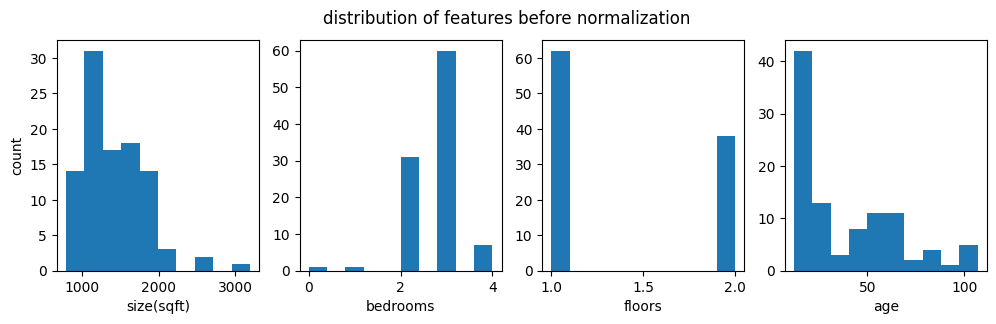

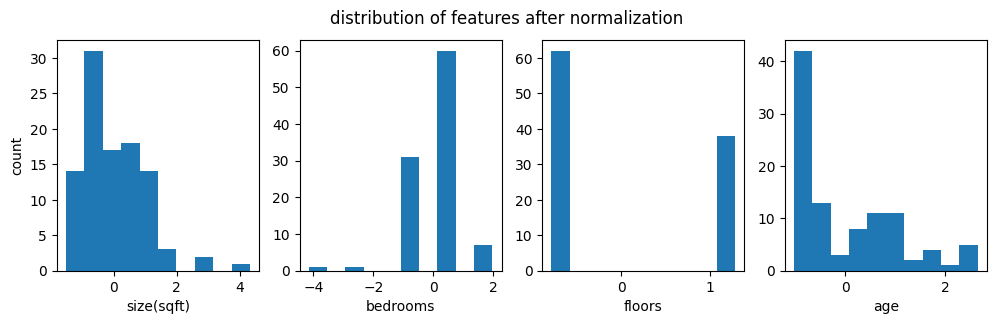

In [37]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(X_train[:,i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    ax[i].hist(X_norm[:,i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features after normalization")

plt.show()

In [38]:
# initialize parameters
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 0.03
# run gradient descent
w_norm, b_norm, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")




Iteration 0: Cost [66750.97577789]   
Iteration 100: Cost [604.5552983]   
Iteration 200: Cost [252.82258888]   
Iteration 300: Cost [224.16244309]   
Iteration 400: Cost [220.31615486]   
Iteration 500: Cost [219.79352908]   
Iteration 600: Cost [219.72248088]   
Iteration 700: Cost [219.71282163]   
Iteration 800: Cost [219.7115084]   
Iteration 900: Cost [219.71132986]   
b,w found by gradient descent: [0.00193512],[ 0.25773349 -0.00152342 -0.00266001 -0.19389157] 


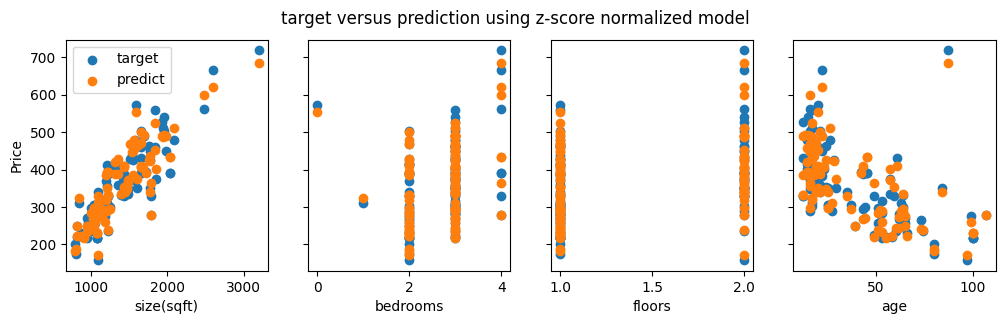

In [39]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [40]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000}")

[-0.51849608  0.44436943 -0.78288136  0.05235597]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $[318937.50516701]


# **Linear Regression using Scikit-Learn**

In [41]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [42]:
# load the dataset
df = pd.read_csv('houses_dataset.csv')
df.head()

,size(sqft),bedrooms,floors,age,price
0,952,2,1,65,271.5
1,1244,3,1,64,300.0
2,1947,3,2,17,509.8
3,1725,3,2,42,394.0
4,1959,3,2,15,540.0


In [43]:
df.shape

(100, 5)

In [44]:
X_train = df.drop('price', axis=1).values
y_train = df[['price']].values

In [45]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2406    4    1   95]
Peak to Peak range by column in Normalized X:[5.83735704 6.12923357 2.06021411 3.68430905]


In [46]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 117, number of weight updates: 11701.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                     w: {w_norm}, b:{b_norm}")
print( "model parameters from previous train: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                     w: [110.07492095 -21.19407033 -32.35049116 -37.85452192], b:[362.22046694]
model parameters from previous train: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [48]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b.
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[248.61664505 295.5904258  485.68457998 389.69519495]
Target values 
[[271.5]
 [300. ]
 [509.8]
 [394. ]]


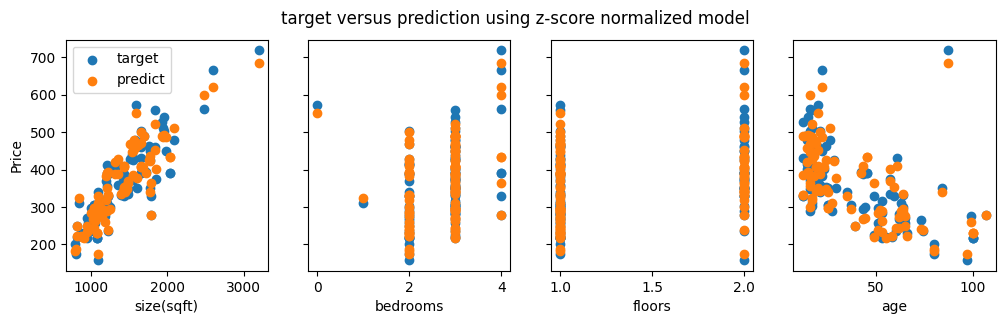

In [49]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()